In [1]:
import os
import numpy as np

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
# matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

* 많은 경우 머신러닝 문제는 훈련 샘플 각각이 많은 특성들을 가지고 있다. 이렇게 많은 특성은 훈련을 느리게 할 뿐만 아니라, 좋은 솔루션을 찾기 어렵게 만든다. 이런 문제를 차원의 저주(Curse of dimensionality)라고 한다.

* 차원 축소는 시각화에도 유용하다.

# 8.1 차원의 저주

* 머신러닝에서 데이터 셋의 특성이 많아지게 되면, 각 특성인 하나의 차원 또한 증가하게 된다. 이로 인해 고차원 데이터셋은 매우 희박할 위험이 있다. 즉, 대부분의 훈련 데이터가 서로 멀리 떨어져 있게 된다.
* 새로운 샘플도 훈련 샘플과 멀리 떨어져 있을 가능성이 높다는 뜻으로, 저차원일 때보다 예측이 더 불안정해지고 괴대적합 위험이 커진다.
* 이 차원의 저주를 해결하는 해결책 하나는 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것이다. 하지만 현실적으로 일정 밀도에 도달하기 위해 필요한 훈련 샘플 수는 차원 수가 커짐에 따라 기하급수적으로 늘어나기 때문에 힘들다.

# 8.2 차원 축소를 위한 접근 방법

## 8.2.1 투영

* 실전 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않다.
* 많은 특성은 거의 변화가 없는 반면, 다른 특성들은 서로 강하게 연관되어 있다.
* 결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 부분공간에 놓여 있다.
* 즉, 고차원 데이터의 특성 중 일부 특성으로 데이터를 표현할 수 있다는 말이다.


3차원 공간상의 데이터를 2차원 부분 공간으로 투영시켜 2차원 데이터셋으로 만들기
<img src="images/8_images/3d-data.png">

훈련 샘플을 이 부분 공간에 수직으로 투영하여 다음과 같은 2D 데이터 셋을 얻을 수 있다.
<img src="images/8_images/2d-data.png"> 

## 8.2.2 매니폴드 학습

* 매니폴드(Maniford) : 다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간이다. 즉, 국소적으로는 유클리드 공간과 구별할 수 없으나, 대역적으로 독특한 위상수학적 구조를 가질 수 있다. 예를들어, 아래의 원 그림은 모든 점에 대해서 국소적으로 직선과 같은 구조를 가지는 1차원 매니폴드라 할 수 있다.

<img src="images/8_images/manifold01.png">

* 스위스 롤은 2D 매니폴드의 한 예이다. 2D 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D모양
* 일반적으로 d차원 매니폴드는 국부적으로 d차원 초평면으로 보일 수 있는 n차원 공간의 일부
* 스위스 롤의 경우에는 d=2이고 n=3이다. 국부적으로 2D평면으로 보이지만 3차원으로 말려 있는 모양

<img src="images/8_images/manifold02.png">

* 매니폴드 학습(Manifold Learning) : 훈련 샘플이 놓여 있는 매니폴드를 모델링
* 매니폴드 가정/가설(Manifold Assumption) : 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여있다는 가정
* 매니폴드 가정은 종종 다른 가정과 병행되곤 한다. 처리해야할 작업(분류, 회귀)이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이란 가정
<img src="images/8_images/manifold03.png">

* 위 암묵적인 가정이 항상 유효하지는 않다.
<img src="images/8_images/manifold04.png">

* 요약하면 모델을 훈련시키기 전에 훈련 세트의 차원을 감소시키면 훈련 속도는 빨라지지만, 항상 더 낫거나 간단한 솔루션이 되는것은 아니다. 전적으로 데이터셋에 달려있다.

# 8.3 PCA

* 주성분 분석(Principal Component Analysis, PCA) : 대표적인 차원 축소 알고리즘
 - 먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시킨다.

## 8.3.1 분산 보존

* 저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 한다.

예를 들어 왼쪽 2D 데이터셋이 세 개의 축과 함께 표현되어 있다. 오른쪽 그래프는 데이터셋이 각 축에 투영된 결과이다.
<img src='images/8_images/pca01.png'>
* 다른 방향으로 투영하는 것보다 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적으로 보인다.

## 8.3.2 주성분

* PCA
 - 1. 학습 데이터셋에서 분산이 최대인 축을 찾는다.
 - 2. 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다.
 - 3. 이전의 두 축에 직교하는 세 번째 축을 찾는다.
 - 4. 고차원 데이터셋이라면, 데이터셋에 있는 차원의 수만큼 n번째 축을 찾는다.!
 
<img src="images/8_images/pca02.gif">

* i번째 축을 이 데이터의 i번째 주성분(Principal Component, PC)라고 부른다. 
* 예를들어, 위의 그림에서는 2차원 데이터셋이므로 PCA는 분산을 최대로 보존하는 단위벡터 $c_1$이 구성하는 축과 이 축에 직교하는 $c_2$가 구성하는 축을 찾게 된다.

* 훈련 세트의 주성분을 찾는 방법
 - 특잇값 분해(Singular Value Decomposition, SVD)라는 표준 행렬 분해 기술이 있어서 훈련 세트 행렬 X를 세 개의 행렬의 행렬 곱셈으로 분해할 수 있다.
 - 여기서 찾고자 하는 모든 주성분의 단위 벡터가 V에 담겨 있다.
 - 넘파이의 svd() 함수를 사용해 훈련 세트의 모든 주성분을 구한 후 처음 두 개의 PC를 정의하는 두 개의 단위 벡터를 추출한다.

## 8.3.3 d차원으로 투영하기

* 주성분을 모두 추출해냈다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소시킬 수 있다. (이 초평면은 분산을 가능한 최대한 보존하는 투영)
* 초평면에 훈련 세트를 투영하고 d차원으로 축소된 데이터셋$(X)$을 얻기 위해서는 다음과 같이 행렬 
$X$와 $V$의 첫 d열로 구성된 행렬 $W_d$를 행렬 곱셈하면 된다. 

 - 훈련세트를 d차원으로 투영하기
   - $X_d=proj$ = $XW_d$

## 8.3.4 사이킷런 사용하기

* 사이킷런의 PCA 모델은 SVD 분해방법을 사용하여 구현한다.
* PCA 변환기를 데이터셋에 학습시키고 나면 $components$_ 속성에 $W^d$의 전치가 담겨있다.
* 첫 번째 주성분을 정의하는 단위 벡터는 $pca.components_.T[:, 0]$

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


In [3]:
# PCA모델을 사용해 데이터셋의 차원을 2로 줄이기

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

singular value : [6.77645005 2.82403671]
singular vector :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


## 8.3.5 설명된 분산의 비율
* 설명된 분산의 비율(Explained variance ratio) : explained_variance_ratio_ 변수에 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다.

In [4]:
#3D 데이터셋의 처음 두 주성분에 대한 설명된 분산의 비율
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

## 8.3.6 적절한 차원 수 선택하기

* 축소할 차원 수를 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다.

In [5]:
#훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원 수 계산

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1
print('선택할 차원 수 : ', d)

선택할 차원 수 :  2


In [7]:
# n_components=d로 설정(0~1 사이의 값) 하여 PCA를 계산할 수 도 있다.

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


## 8.3.7 압축을 위한  PCA

* 차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어든다.

In [9]:
from tensorflow.keras.datasets import mnist

# MNIST load
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# reshape
train_x = train_x.reshape(-1, 28*28) 

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)

print('선택한 차원(픽셀) 수 :', pca.n_components_)

선택한 차원(픽셀) 수 : 154


In [11]:
# 위에서 압축한 X_reduced에다가 PCA의 inverse_transform() 메소드를 이용햐 784 차원으로 복원
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(train_x)
X_recovered = pca.inverse_transform(X_reduced)


In [12]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

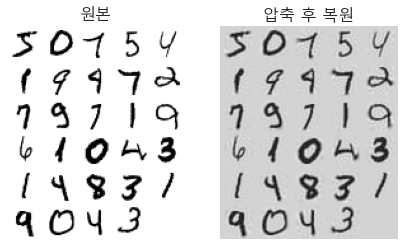

In [13]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)
plot_digits(X_recovered[::2100])

* 예시로 MNIST 데이터셋에 분산의 95%를 유지하도록 PCA를 적용
 - PCA 적용결과 총 784 차원에서 154로 80%정도 차원이 축소. 압
 - 압축한 데이터셋을 이용해 SVM과 같은 분류알고리즘을 학습 시킬 경우 학습 속도를 빠르게 할 수 있다.
 - 압축된 데이터셋에 PCA 투영 변환을 반대로 적용하여 다시 원 데이터의 차원(mnist 경우 784)로 복원할 수 있다. 위에서 5% 만큼의 정보(분산)을 잃었기 때문에 완벽하게 복원은 할 수 없지만, 원본 데이터와 비슷하게 복원할 수 있다. 
 - 이러한 원본 데이터와 복원한 데이터간의 평균 제곱 거리를 재구성 오차(reconstruction error)라고 한다.

* 압축 후 복원하는 과정을 식으로 나타내면 다음과 같다.
 - $
\mathbf{X}_{\text{recovered}} = \mathbf{X}_{d \text{-proj}} \mathbf{V}_{d}^{T}
$
  
   -  $\mathbf{X}_{d \text{-proj}} = \mathbf{X} \mathbf{V}_{d}$
   -  $\mathbf{V}_{d}$ = orthogonal matrix → $\mathbf{V}_{d}\mathbf{V}_{d}^{T} = \mathbf{I}$

## 8.3.8 랜덤 PCA

* svd_solver 매개변수를 'randomized'로 지정하면 사이킷런은 랜덤 PCA라 부르는 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾는다.
* 이 알고리즘의 계산 복잡도는 완전한 SVD 방식인 $O(m * n^2) + O(n^3)$ 이 아니라 $O(m * d^2) + O(d^3)$이다.
* 따라서 d가 n보다 많이 작으면 완전 SVD보다 훨씬 빠르다
* svd_solver의 기본값은 "auto" / m이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 사이킷런은 자동으로 랜덤 PCA 알고리즘을 사용한다. 아니면 완전한 SVD 방식을 사용한다.
* 완전한 SVD방식을 강제하려면 svd_solver 매개변수를 "full"로 지정한다.

In [17]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(train_x)
X_reduced.shape

(60000, 154)

## 8.3.9 점진적 PCA

* PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것
* 점진적 PCA(Incremental PCA, IPCA) : 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다. 이런 방식은 훈련 세트카 클 때 유용하고 온라인으로 PCA를 적용할 수도 있다.

In [25]:
#Scikit-Learn에서는 IncrementalPCA를 통해 Incremental PCA를 사용할 수 있다. 
#MNIST 데이터를 100개의 미니배치로 나눠 PCA를 수행

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(train_x, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(train_x)

In [26]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

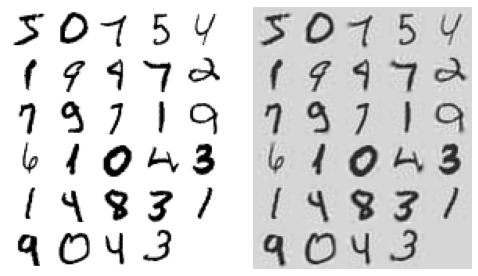

In [27]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [30]:
# numpy의 memmap 파이썬 클래스를 사용하는 방법

X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components = 154, batch_size = batch_size)
inc_pca.fit(X_mm)

SyntaxError: positional argument follows keyword argument (<ipython-input-30-fa46a64c4838>, line 3)

# 8.4 커널 PCA

* SVM에서 샘플을 매우 높은 고차원 공간으로 암묵적으로 매핑하여 서포트 벡터 머신의 비선형 분류의 회귀를 가능하게 하는 수학적 기법인 커널 트릭이 있다.
* 고차원 특성 공간에서의 선형 결정 경계는 원본 공간에서는 복잡한 비선형 결정 경계에 해당한다. 같은 기법을 PCA에 적용해 차원 축소를 위한 복잡한 비선형 투형을 수행할 수 있다.
* 이를 커널 PCA(kernel PCA, kPCA)라고 한다.

In [32]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [33]:
#사이킷런의 KernelPCA를 사용해 RBF커널로 kPCA를 적용
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma = 0.04)
X_reduced = rbf_pca.fit_transform(X)

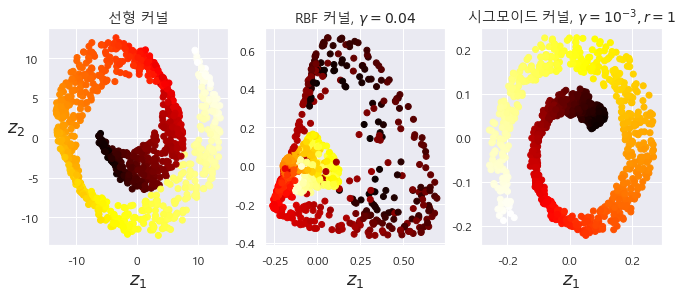

In [34]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

## 8.4.1 커널 선택과 하이퍼파라미터 튜닝

* kPCA는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다.
* 하지만 차원 축소는 종종 지도학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.
* 다음 코드는 두 단계의 파이프라인을 만드는데, 먼저 kPCA를 사용해 차원을 2차원으로 축소하고 분류를 위해 로지스틱 회귀를 적용한다. 그런 다음 파이프라인 마지막 단게에서 가장 높은 분류 정확도를 얻기 위해 GridSearchCV를 사용해 가장 좋은 커널과 gamma 파라미터를 찾는다

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [36]:
#가장 좋은 커널과 하이퍼파라미터
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


* 축소된 공간에 있는 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아닌 특성 공간에 놓이게 된다.
* 이 특성 공간은 무한 차원이기 때문에 재구성된 포인트를 계산할 수 없고 재구성에 따른 실제 에러를 계산할 수 없다.
* 다행히 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다.
* 이를 재구성 원상(Pre-image)라고 한다. 원상을 얻게 되면 원분 샘플과의 제곱 거리를 측정할 수 있다. 그래서 재구성 원상의 오차를 최소화하는 커널과 하이퍼파라미터를 선택할 수 있다.

In [37]:
#투영된 샘플을 훈련 세트로, 원본 샘플을 타킷으로 하는 지도 학습 회귀모델을 훈련
# 사이킷런의 fit_inverse_transform = True를 지정하면 이를 자동으로 수행

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [38]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

8.029117536196503e-27

# 8.5 LLE

* 지역 선형 임베딩(Locally Linear Embedding, LLE) : 강력한 비선형 차원 축소 기술이다. 투영에 의존하지 않는 매니폴드 학습으로 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정한다. 그런 다음 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다.

In [40]:
#사이킷런의 LocallyLinearEmbedding을 사용해 스위스 롤 펼치기
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

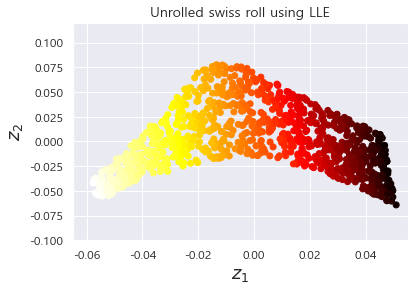

In [42]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

### LLE 알고리즘
<img src = 'images/8_images/LLE.png'>

Step 1: Select neighbors

Step 2: Reconstruct with linear weights

Step 3: Map to embedded coordinates

### Step 1: Select Neighbors
먼저, $N$-차원($N$-Features)을 가지는 $m$-개의 데이터셋의 각 데이터 포인트 $X_i$에 대해, $X_i$와 가장 가까운 $k$-개의 이웃점($k$-nearest neighbors) $X_j$, $(j=1, \dots, k)$ 들을 선택한다. 여기서 $k$는 하이퍼파라미터(hyper-parmeter)로써 사람이 직접 적절한 개수를 정해준다.

### Step 2: Reconstruct with linear weights
LLE는 'Step 1'에서 선택한 각 데이터 포인트 $\vec{x_i}$와 그리고 $x_i$에 가까운 $k$-개의 이웃점들 $\vec{x_j}$ $(j=1,\dots,k)$는 매니폴드의 locally linear patch 상에 있거나 가까이 있을 것이라 가정한다.

이러한 가정을 바탕으로 해당 데이터 포인트 $\vec{x_i}$와 가장 가까운 $k$-개의 이웃들 $\vec{x_j}$로 부터 $\vec{x_i}$를 가장 잘 재구성(reconstruction)하는 가중치 $w_{ij}$를 구한다. 즉, 이웃점 $\vec{x_j}$에 대해 $w_{ij}$와의 행렬 곱을 통해 $\sum_{j=1}^{k}{w_{ij}\vec{x}_j} \approx \vec{x}_i$를 만족하는 $w_{ij}$를 구하는 것이다. $\vec{x}_i$와 $\sum_{j=1}^{k}{w_{ij}\vec{x}_j}$ 간의 오차(error)를 Reconstruction error라 하고 다음과 같이 식으로 나타낼 수 있다.$$
\varepsilon_{i} (\mathbf{w}) = \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2}
$$

따라서, 위의 식 $\varepsilon_{i}(\mathbf{w})$를 최소화(minimize) 하는 문제이며, 이때의 제약식은 $\sum_{j=1}^{k}{w_{ij}} = 1$이다. 이를 식으로 나타내면 다음과 같다.$$
\text{min} \quad \varepsilon_i (\mathbf{w}) = \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2}
$$

$$
\text{s.t.} \quad \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}} = 1
$$
위의 식에서 $\vec{x_i}, \vec{x_j}$에 어떤 상수 벡터 $\vec{c}$를 더하거나 해도 $w_{ij}$를 최소화하는데 아무런 영향을 주지 않는다.$$
\begin{align*}
\varepsilon_i(\mathbf{w}) &amp;= \left\| \vec{x_i} + \vec{c} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij} \left( \vec{x_j} + \vec{c} \right)} \right\|^{2} \\ &amp;= \left\| \vec{x}_i + \vec{c} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x}_{j}} - \vec{c} \right\|^{2} \\ &amp;= \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2}
\end{align*}
$$

만약, 위의 식 $\vec{c} = -\vec{x}_i$ 라고 한다면 아래와 같이 나타낼 수 있다.$$
\begin{align*}
\varepsilon_i (\mathbf{w}) &amp;= \left\| \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\left( \vec{x}_{j} - \vec{x}_{i} \right)} \right\|^{2} \\ &amp;= \left\| \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij} \vec{z}_{j}} \right\|^{2}, \quad (\vec{z}_{j} = \vec{x}_{j} - \vec{x}_{i})
\end{align*}
$$

$\mathbf{w}_i = \sum_{j=1}^{k}{w_{ij}}$는 $(k \times 1)$-행렬이고, $\mathbf{z} = \sum_{j=1}^{k}{\vec{z}_{j}}$는 $(k \times N)$-행렬이므로 위의 식을 행렬 형태로 나타내면 아래와 같다.$$
\begin{align*}
\left\| \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij} \vec{z}_{j}} \right\|^{2} &amp;= \left( \mathbf{z}^{T} \mathbf{w}_i \right)^{T}\left( \mathbf{z}^{T} \mathbf{w}_i \right) \\ &amp;= \mathbf{w}_{i}^{T} \mathbf{z} \mathbf{z}^{T} \mathbf{w}_{i} \\ &amp;= \mathbf{w}_{i}^{T} \mathbf{G}_{i} \mathbf{w}_{i}, \quad (\mathbf{G}_{i} = \mathbf{z}\mathbf{z}^{T})
\end{align*}
$$

위의 식에서 $\mathbf{G}_{i}$는 symmetric 한 행렬이며, 이러한 행렬을 Gram Matrix 라고 한다. $\mathbf{G}_{i}$는 선택한 데이터 포인트 $\vec{x}_i$에 대응되는 Gram Matrix 이다.

이러한 과정을 통해 $\varepsilon_i (\mathbf{w})$를 최소화 하는 문제를 다음과 같은 식으로 나타낼 수 있다.$$
\text{min} \quad \varepsilon_i (\mathbf{w}) = \left\| \vec{x_i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{x_j}} \right\|^{2} = \mathbf{w}_{i}^{T} \mathbf{G}_{i} \mathbf{w}_{i}
$$

$$
\text{s.t.} \quad \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}} = 1 = \mathbf{1}^{T} \mathbf{w}_{i}
$$
$\mathbf{1}$은 $(k \times 1)$-행렬이 모두 1로 구성된 행렬을 의미한다.

위의 식을 '서포트벡터머신, SVM'에서 살펴본 라그랑제 승수법을 이용하여 계산할 수 있다. 위의 식을 라그랑지안 함수 $L$로 나타내면 다음과 같다 ($\lambda$는 라그랑제 승수이다).$$
L(\mathbf{w}_{i}, \lambda) = \mathbf{w}_{i}^{T} \mathbf{G}_{i} \mathbf{w}_{i} - \lambda \left( \mathbf{1}^{T} \mathbf{w}_{i} - 1 \right)
$$

이렇게 라그랑지안으로 나타낸 함수 $L$ 을 $\mathbf{w_i}$에 대한 편미분 $\frac{\partial L}{\partial \mathbf{w}_{i}} = 0$을 통해 $\mathbf{w}_{i}$를 구할 수 있다.$$
\begin{align*}
\frac{\partial L}{\partial \mathbf{w}_{i}} &amp;= \left( \mathbf{G}_{i} + \mathbf{G}_{i}^{T} \right) \mathbf{w}_{i} - \lambda \mathbf{1}, \quad (\mathbf{G}_{i} = \mathbf{G}_{i}^{T}) \\ &amp;= 2 \mathbf{G}_{i} \mathbf{w}_{i} - \lambda \mathbf{1} \\ &amp;= 0
\end{align*}
$$

$$
\therefore \mathbf{w}_{i} = \frac{\lambda}{2} \mathbf{G}_{i}^{-1} \mathbf{1}
$$

### Step 3: Map to Embedded Coordinates
'Step 2'에서 구한 가중치 $w_{ij}$는 데이터 포인트 $\vec{x}_i$와 이웃점들 $\vec{x}_j$간의 지역 선형 관계(locally linear relationship)를 나타낸다. 마지막 단계인 'Step 3'에서는 이러한 관계가 최대한 보존 되도록 데이터를 저차원인 $d$-차원 공간($d &lt; N$)으로 매핑(mapping)한다. 이 때, $\vec{y}_i$를 $d$-차원 공간에서의 $\vec{y}_i$의 상(image, $\vec{x}_i \mapsto \vec{y}_i$를 의미) 이라고 한다면, $\vec{y}_i$와 $d$-차원 공간에서의 이웃점들 $\vec{y}_j$에 대해 재구성(reconstructed)된 $\sum_{j=1}^{k}{w_{ij}} \vec{y}_j$ 사이의 거리를 최소화하는 $\mathbf{Y}$를 찾는 최소화 문제가 된다. 여기서 $w_{ij}$는 'Step 2'에서 구한 $w_{ij}$이다. 이를 식으로 나타내면 다음과 같다.$$
\text{min} \quad \Phi(\mathbf{Y}) = \sum_{i=1}^{m}{\left\| \vec{y}_{i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{y}_{j}} \right\|^{2}}
$$

이 때, 논문에서는 위의 최소화 문제가 잘 풀리기(well-posed) 위해 다음과 같은 제약식을 추가해 준다.$$
\text{s.t.} \quad \begin{cases} \frac{1}{m} \sum_{i=1}^{m}{\vec{y}_i} = 0 \\ \\ \frac{1}{m} \mathbf{Y}^{T} \mathbf{Y} = \mathbf{I} \end{cases}
$$위의 제약식을 살펴보면, '차원축소 - PCA'에서 공분산 구하는 방법을 살펴본 것과 같이 $d$-차원 공간상에 매핑된 $m$-개의 데이터셋($\mathbf{Y}$)에서 데이터 포인트 $\vec{y}_{i}$의 평균은 $0$이고, $\mathbf{Y}$의 공분산(covariance)는 $\mathbf{I}$ (identity) 행렬인 것을 알 수 있고, $\mathbf{Y}$은 symmetric 한것을 알 수 있다.

위의 $\Phi (\mathbf{Y})$는 아래와 같이 풀어서 나타낼 수 있다.$$
\begin{align*}
\Phi (\mathbf{Y}) &amp;= \sum_{i=1}^{m}{\left\| \vec{y}_{i} - \sum_{\underset{j \neq i}{j=1}}^{k}{w_{ij}\vec{y}_{j}} \right\|^{2}} \\ &amp;= \sum_{i=1}^{m}{\left[ \vec{y}_{i}^{2} - \vec{y}_{i} \left( \sum_{j=1}^{k}{w_{ij} \vec{y}_{j}} \right) - \left( \sum_{j=1}^{k}{w_{ij} \vec{y}_{j}} \right)\vec{y}_{i} + \left( \sum_{j=1}^{k}{w_{ij} \vec{y}_{j}} \right)^{2} \right]} \\ &amp;= \mathbf{Y}^{T}\mathbf{Y} - \mathbf{Y}^{T} (\mathbf{wY}) - (\mathbf{wY})^{T}\mathbf{Y} + (\mathbf{wY})^{T} (\mathbf{wY}) \\ &amp;= \left( \mathbf{Y}^{T} - \mathbf{Y}^{T}\mathbf{w}^{T} \right) \mathbf{Y} - \left( \mathbf{Y}^{T} - \mathbf{Y}^{T}\mathbf{w}^{T} \right) \mathbf{w}\mathbf{Y} \\ &amp;= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right) \mathbf{Y} - \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right) \mathbf{wY} \\ &amp;= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right) \left( \mathbf{Y} - \mathbf{wY} \right) \\ &amp;= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w}^{T} \right)\left( \mathbf{I} - \mathbf{w} \right) \mathbf{Y} \\ &amp;= \mathbf{Y}^{T} \left( \mathbf{I} - \mathbf{w} \right)^{T} \left( \mathbf{I} - \mathbf{w} \right) \mathbf{Y}, \quad \left( \mathbf{M} =  \left( \mathbf{I} - \mathbf{w} \right)^{T} \left( \mathbf{I} - \mathbf{w} \right) \right) \\ &amp;= \mathbf{Y}^{T} \mathbf{M} \mathbf{Y}
\end{align*}
$$

따라서, 위의 최소화 문제를 다음과 같이 나타낼 수 있다.$$
\text{min} \quad \Phi (\mathbf{Y}) = \mathbf{Y}^{T} \mathbf{M} \mathbf{Y}
$$

$$
\text{s.t.} \begin{cases} \frac{1}{m} \sum_{i=1}^{m}{\vec{y}_i} = 0 \\ \\ \frac{1}{m} \mathbf{Y}^{T} \mathbf{Y} = \mathbf{I} \end{cases}
$$
위의 식을 라그랑제 승수 $\alpha$를 이용해 라그랑지안 함수 $L$로 나타내면 아래의 식과 같다.$$
L(\mathbf{Y}, \alpha) = \mathbf{Y}^{T} \mathbf{M} \mathbf{Y} - \alpha \left( m^{-1} \mathbf{Y}^{T}\mathbf{Y} - \mathbf{I} \right)
$$

이렇게 라그랑지안 함수로 나타낸 함수 $L$을 $\mathbf{Y}$에 대한 편미분 $\frac{\partial L}{\partial \mathbf{Y}} = 0$을 통해 $\mathbf{Y}$를 구할 수 있다.
$$
\begin{align*}
\frac{\partial L}{\partial \mathbf{Y}} &amp;= \left( \mathbf{Y} + \mathbf{Y}^{T} \right) \mathbf{M} - \frac{2}{m} \alpha \mathbf{Y} \\ &amp;= 2 \mathbf{M}\mathbf{Y} - \frac{2}{m} \alpha \mathbf{Y} \\ &amp;= 0
\end{align*}
$$

$$
\therefore \mathbf{M} \mathbf{Y} = \frac{\alpha}{m} \mathbf{Y} 
$$
위의 결과에서, $\mathbf{Y} $는 $\mathbf{M} $의 eigenvectors 인 것을 알 수 있고, $\frac{\alpha}{m}$은 eigenvalue인 것을 알 수 있다. 위의 문제는 $\mathbf{Y}$를 찾는 것이며, PCA와는 다르게 $\mathbf{Y} $ 중에서도 가장 값을 최소화하는 eigenvector인 맨 오른쪽에 위치하는 열벡터이다.

### 계산 복잡도
LLE 알고리즘의 계산 복잡도는 다음과 같다.

$k$-개의 가까운 이웃 찾기 : $O(m\log{(m)}n\log{(k)})$
가중치 $w_{ij}$ 최적화: $O(mnk^{3})$
저차원으로의 매핑: $O(dm^{2})$
마지막의 저차원으로의 매핑의 복잡도에서 $m^{2}$ , 전체 데이터 셋의 제곱이므로 LLE 알고리즘은 대용량의 데이터셋에 적용하기는 어려운 점이 있다.

# 8.6 다른 차원 축소 기법

* 랜덤 투영(Random Projection)
  - 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영
  - 랜덤 투영이 실제로 거리를 잘 보존하는 것으로 밝혀졌다.
  - 차원 축소 품질은 샘플 수와 목표 차원수에 따라 다르다.
* 다차원 스케일링(Multidimensional Scaling, MDS)
 - 샘플 간의 거리를 보존하면서 차원을 축소
* Isomap
 - 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다.
 - 그런 다음 샘플 간의 지오데식 거리(Geidesic Distance)를 유지하면서 차원을 축소
* t-SNE(t-distributed stochastic neighbor embedding)
 - 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소
 - 주로 시각화에 많이 사용되며 특히 고차원 공간에 있는 샘플의 군집을 시각화할 때 사용
* 선형 판별 분석(Linear Discriminant Analysis, LDA)
 - 사실 분류 알고리즘
 - 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습(축은 데이터가 투영되는 초평면을 정의하는데 사용할 수 있음)
 - 투영을 통해 가능한 클래스를 멀리 떨어지게 유지시키므로 SVM 분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는데 좋다는 장점

In [46]:
#사이킷런을 이용한 MDS / Isomap / t-SNE
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [47]:
from sklearn.manifold import MDS, Isomap, TSNE

# MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

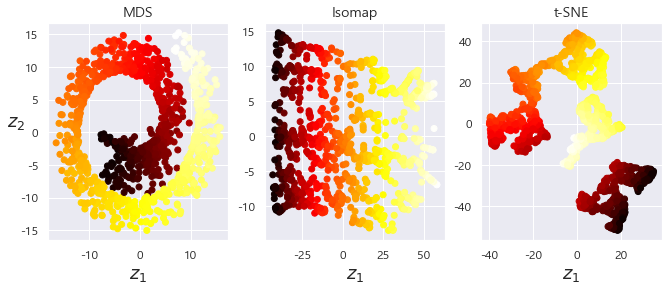

In [48]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()